In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import scipy.optimize
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('house_price_data_2.csv')
df.shape

(21616, 21)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df2 = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
'waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]

In [5]:
#Data cleaning
df2 = df2.dropna() #tidak ada NA
df2
#ganti kolom floors dan bathrooms jadi integer
#floors
data_types_dict = {'floors': np.int64}
df2 = df2.astype(data_types_dict)
#bathrooms
data_types_dict = {'bathrooms': np.int64} #jadi ada yang 0 karena tadinya 0
.5
df2 = df2.astype(data_types_dict)
df2.dtypes #cek tipe data
#berdasarkan data yang kurang baik maka dibuang datanya atau di drop
#price
df2.price.min() #tidak mungkin harga rumah hanya 10 dollar
df2 = df2[(df2.price>10)]
df2
#cek kembali nilai terkecil dari price
df2.price.min() #sudah betul
#hapus yang bedroomnya 0
df2 = df2[(df2.bedrooms>0)]
df2
#kamarnya ada yang 33 outlier atau tidak mungkin
df2.bedrooms.max()
df2 = df2[(df2.bedrooms<33)]
df2
#cek lagi maksnya
df2.bedrooms.max()
#hapus yang bathroomnya 0
df2 = df2[(df2.bathrooms>0)]
df2
#data cleaning sqft_living
df2.sqft_living.min() #tidak mungkin nilainya 1 saja
df2 = df2[(df2.sqft_living>1)]
df2
#cek lagi apakah sudah make sense atau belum
df2.sqft_living.min() #sudah jadi 390
#cek sqft_lot15
df2.sqft_lot15.min() #tidak mungkin minus
#data cleaning untuk sqft_lot15
df2 = df2[(df2.sqft_lot15>0)]
df2
#cek lagi apakah sudah betul
df2.sqft_lot15.min() #sudah jadi 651
df2 = df2.dropna() #tidak ada NA
df2 #data terakhir
df2.describe() #cek lagi takut ada yang masih salah

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.152100e+04,21521.000000,21521.000000,21521.000000,2.152100e+04,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000
mean,5.411577e+05,3.376888,1.756796,2084.381720,1.509624e+04,1.447377,0.007295,0.233772,3.409553,7.664885,1791.923424,292.458297,1971.095906,84.393801,47.560153,-122.213961,1988.456717,12745.741880
std,3.676345e+05,0.900177,0.727994,916.867372,4.147093e+04,0.551976,0.085102,0.765512,0.649714,1.167583,827.037378,443.148343,29.353133,401.664267,0.138566,0.140370,685.168644,27284.681048
min,7.800000e+04,1.000000,1.000000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.230000e+05,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1920.000000,7.617000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.066100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,1997.000000,0.000000,47.678000,-122.125000,2370.000000,10080.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df2.shape


(21521, 18)

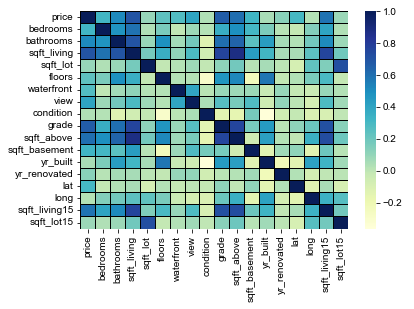

In [6]:
korelasi = df2.corr()
sns.heatmap(data=korelasi, cmap="YlGnBu", linecolor="black", linewidths=0.5)
sns.set(rc={'figure.figsize':(5, 7)})

In [7]:
df2.corr()['price'].sort_values()

long             0.022485
condition        0.035820
yr_built         0.051881
sqft_lot15       0.083302
sqft_lot         0.090087
yr_renovated     0.126895
floors           0.236068
waterfront       0.272474
lat              0.306983
bedrooms         0.314181
sqft_basement    0.323097
view             0.398778
bathrooms        0.510647
sqft_living15    0.584860
sqft_above       0.604735
grade            0.668579
sqft_living      0.701648
price            1.000000
Name: price, dtype: float64

In [8]:
df3 = df2[['price','bathrooms','sqft_living','grade','sqft_above','sqft_living15']]

In [132]:
X = df3[['bathrooms']].values

In [17]:
X = df3[['grade']].values

In [145]:
X = df3[['sqft_living']].values

In [127]:
X = df3[['sqft_above']].values

In [12]:
X = df3[['bathrooms', 'sqft_living15']].values

In [94]:
# X = df3[['grade', 'sqft_above']].values
# X = df3[['grade', 'sqft_living']].values
# X = df3[['grade', 'bathrooms']].values
# X = df3[['bathrooms', 'sqft_above']].values
# X = df3[['bathrooms', 'sqft_living']].values

In [9]:
X = df3[['grade', 'bathrooms']].values

In [60]:
X = df3[['grade', 'sqft_above', 'sqft_living', 'bathrooms']].values

In [59]:
X = df3[['grade', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15']].values

In [18]:
X.shape
y = df3[['price']].values
y.shape

(21521, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [27]:
model_regres = LinearRegression()  
model_regres.fit(X_train, y_train)

LinearRegression()

In [28]:
print(model_regres.coef_)
#Retrieve the intercept:
print(model_regres.intercept_)
# Model: y = 0.86X + 52.1

[[179052.52783277  80695.80771541]]
[-973929.22065292]


In [29]:
y_pred = model_regres.predict(X_test)


In [30]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 177423.6415441476
Mean Squared Error (MSE): 81887644157.24677
Root Mean Squared Error (RMSE): 286160.1722064878


In [31]:
from sklearn.metrics import r2_score
r_2 = r2_score(y_test, y_pred)
print(r_2)

0.46758522109148937


In [158]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)

In [159]:
scores = cross_val_score(model_regres, X, y, scoring="neg_mean_absolute_error", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))

scores = cross_val_score(model_regres, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

scores = cross_val_score(model_regres, X, y, scoring="neg_root_mean_squared_error", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg RMSE: " + str(np.mean(scores)))

scores = cross_val_score(model_regres, X, y, scoring="r2", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[-8.21235929e+10 -5.85787187e+10 -8.81917377e+10 -8.44317020e+10
 -7.63457961e+10 -6.92289677e+10 -6.96669145e+10 -7.20954045e+10
 -7.67837441e+10 -7.03880119e+10]
Avg MSE: -74783459006.10275
[0.45263558 0.42997206 0.42646778 0.45067412 0.44702781 0.47965495
 0.46338639 0.44051446 0.44022777 0.43077628]
Avg R2: 0.44613371861368945


In [78]:
pkl_filename = "House_regres_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model_regres, file)

pkl_filename = "House_regres_model.pkl"   
with open(pkl_filename, 'rb') as file:  
    loaded_model_regres = pickle.load(file)

df_new = pd.read_csv('house_price_data_2.csv')
X_new = df_new[['sqft_living', 'sqft_above']].values

y_pred_new = loaded_model_regres.predict(X_new)
print(y_pred_new)

[[3.05529107e+08]
 [6.34300970e+08]
 [1.99032289e+08]
 ...
 [2.63969373e+08]
 [4.14623408e+08]
 [2.63969373e+08]]


In [79]:
pkl_filename = "House_regres_model.pkl"   
with open(pkl_filename, 'rb') as file:  
    loaded_model_regres = pickle.load(file)

In [80]:
df_new = pd.read_csv('house_price_data_2.csv')
X_new = df_new[['sqft_living', 'sqft_above', 'grade']].values

In [9]:
df_test = pd.read_csv('house_price_data_new.csv')
df_test.shape

(100, 6)

In [15]:
price = -679787.4 + (df_test["sqft_living"] * 231.44 ) + (df_test["grade"] * 116000 ) + ( df_test["sqft_above"] * -84.2)
df_test["price"] = price
# print(df_test)
df_test.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,582447.4,2,2270,8,2270,2240
1,289759.4,1,1070,7,1070,1220
2,608950.6,2,2450,8,2450,2200
3,267993.0,2,1710,6,1710,1030
4,667890.6,1,2450,8,1750,1760


In [9]:
X = np.arange(-6.0, 6.0, 0.1)
Y = np.exp(X) 

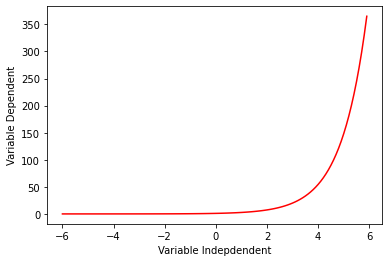

In [10]:

plt.plot(X, Y, 'r') 
plt.ylabel('Variable Dependent')
plt.xlabel('Variable Indepdendent')
plt.show()

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()

# Buat array dari dataframe
X_train_RFR = np.array(X_train)
X_test_RFR = np.array(X_test)

y_train_RFR = np.array(y_train)

# Ubah format y_train ke array 
y_train_RFR_2 = y_train_RFR.ravel()

# train the model
model_RFR.fit(X_train_RFR, y_train_RFR_2)

# predict on test data
y_predRFR = model_RFR.predict(X_test_RFR)

In [33]:
print('')
print('Model regresi non-liner:')
print('MAE model non-linear:', metrics.mean_absolute_error(y_test, y_predRFR))  
print('MSE model non-linear:', metrics.mean_squared_error(y_test, y_predRFR))  
print('RMSE model non-linear::', np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))


Model regresi non-liner:
MAE model non-linear: 164368.38046714597
MSE model non-linear: 67474396527.354454
RMSE model non-linear:: 259758.34255583488


In [34]:
from sklearn.metrics import r2_score
r_2 = r2_score(y_test, y_predRFR)
print('R^2 model non-linear: ', r_2)

R^2 model non-linear:  0.561296868669076


-------------------------------------------

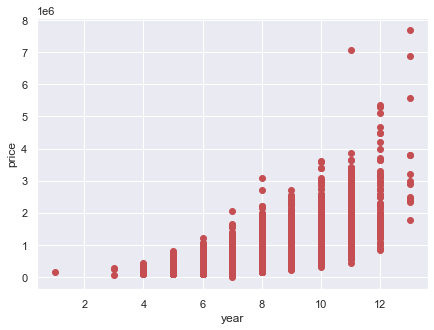

In [33]:
plt.figure(figsize=(7,5))
x_data, y_data = (df["grade"].values, df["price"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('price')
plt.xlabel('year')
plt.show()


In [53]:
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)

[ 0.31561757 10.63072748]


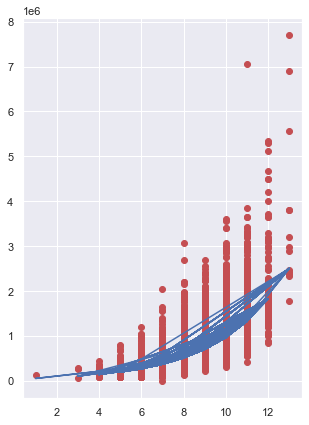

In [80]:
y = np.exp(10.6307) * np.exp(0.3156*x_data)
plt.plot(x_data, y_data, "ro")
plt.plot(x_data, y)

In [57]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

In [60]:
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, x_data, y_data, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

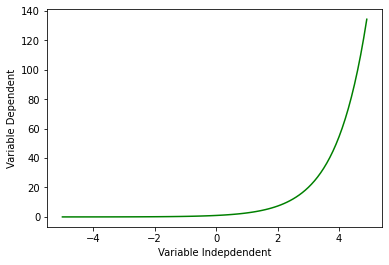

In [40]:
# Pemilihan model regresi non-linear:
# Berdasar observasi pada scatter plot dapat diketahui bahwa
# fungsi yang cocok didekati: Fungsi Sigmoid/logistik
X = np.arange(-5,5.0, 0.1)
Y = np.exp(X)

plt.plot(X,Y,'g') 
plt.ylabel('Variable Dependent')
plt.xlabel('Variable Indepdendent')
plt.show()

In [47]:
def exponent(x, Beta_1, Beta_2):
     y = np.exp(Beta_1*(x+Beta_2))
     return y


In [48]:

# Nilai parameter awal yg dicoba
beta_1 = 0.10
beta_2 = 1990.0

# Pemanggilan fungsi utk prediksi inisial/awal
Y_pred = exponent(x_data, beta_1 , beta_2)

In [49]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [50]:
popt, pcov = curve_fit(exponent, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 4.409353, beta_2 = -1.212633


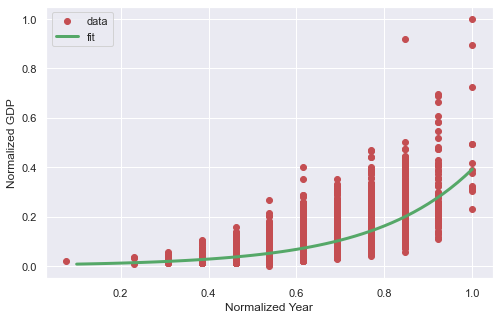

In [51]:
# Buat plot data GDP China vs fungsi sigmoid dengan parameter beta1 & beta2 yg\
# sudah optimal (hasil fitting)

x = np.linspace(1, 10, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = exponent(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, 'g', linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Normalized GDP')
plt.xlabel('Normalized Year')
plt.show()

In [69]:



# Selanjutnya akan diukur kualitas dari model (fungsi sigmoid di atas).
# Split data GDP China ke data train dan test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# Buat model dengan dataset train 
popt, pcov = curve_fit(exponent, train_x, train_y)

# Lakukan prediksi target (nilai GDP) dengan dataset test 
y_hat = exponent(test_x, *popt)

# Evaluasi model
MAE = np.mean(np.absolute(y_hat - test_y))
MSE = np.mean((y_hat - test_y) ** 2)
print("MAE: ", MAE)
print("MSE: ", MSE)
# Hasil MAE & MSE di atas terlihat kecil krn rentang nilai GDP 
# sudah dinormalisasi (dibagi nilai max GDP)

# Jika error dikalikan dg max dari nilai GDP:
print("Max(GDP): ", max(y_data)) 
print("MAE x max(GDP): ", MAE*max(y_data)) 
print("MSE x max(GDP): ", MSE*max(y_data))

MAE:  0.021527043918881435
MSE:  0.0010720761711518565
Max(GDP):  7700000.0
MAE x max(GDP):  165758.23817538706
MSE x max(GDP):  8254.986517869294


--------------------------------

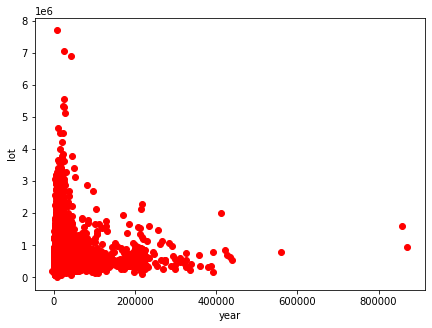

In [146]:
plt.figure(figsize=(7,5))
x_data, y_data = (df["sqft_lot15"].values, df["price"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('lot')
plt.xlabel('year')
plt.show()

In [158]:
def exponent(x, Beta_1, Beta_2):
     y = np.exp(Beta_2*(x-Beta_1))
     return y

In [159]:
beta_1 = 0.10
beta_2 = 1990.0

# Pemanggilan fungsi utk prediksi inisial/awal
Y_pred = exponent(x_data, beta_1 , beta_2)

C:\Users\anton\AppData\Local\Temp\ipykernel_8468\733529281.py:2: RuntimeWarning: overflow encountered in exp
  y = np.exp(Beta_2*(x-Beta_1))


In [14]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

NameError: name 'x_data' is not defined

In [32]:
popt, pcov = curve_fit(exponent, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 4.409353, beta_2 = -1.212633


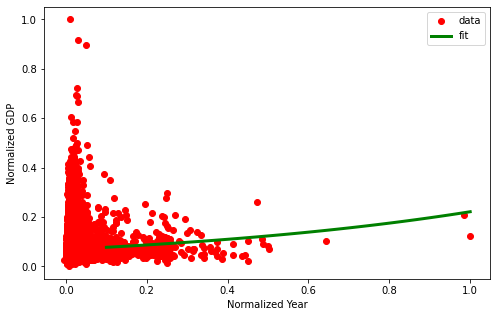

In [162]:
x = np.linspace(1, 10, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = exponent(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, 'g', linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Normalized GDP')
plt.xlabel('Normalized Year')
plt.show()

In [157]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# Buat model dengan dataset train 
popt, pcov = curve_fit(exponent, train_x, train_y)

# Lakukan prediksi target (nilai GDP) dengan dataset test 
y_hat = exponent(test_x, *popt)

# Evaluasi model
MAE = np.mean(np.absolute(y_hat - test_y))
MSE = np.mean((y_hat - test_y) ** 2)
print("MAE: ", MAE)
print("MSE: ", MSE)
# Hasil MAE & MSE di atas terlihat kecil krn rentang nilai GDP 
# sudah dinormalisasi (dibagi nilai max GDP)

# Jika error dikalikan dg max dari nilai GDP:
print("Max(GDP): ", max(y_data)) 
print("MAE x max(GDP): ", MAE*max(y_data)) 
print("MSE x max(GDP): ", MSE*max(y_data))

MAE:  0.030668800875350004
MSE:  0.002300582987965716
Max(GDP):  7700000.0
MAE x max(GDP):  236149.76674019502
MSE x max(GDP):  17714.489007336015


In [10]:
Y = np.exp(X)

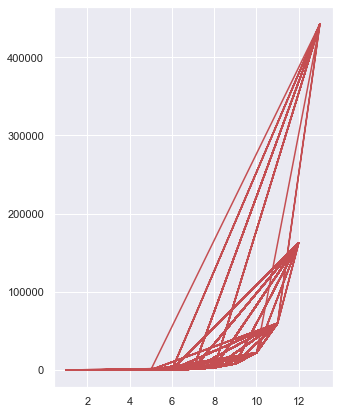

In [13]:
plt.plot(X, Y, 'r') 

In [30]:
popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, xdata, ydata)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [31]:
a = popt[0]
b = popt[1]
c = popt[2]

NameError: name 'popt' is not defined

In [29]:
x_fitted = np.linspace(np.min(xdata), np.max(xdata), 100)
y_fitted = a * np.exp(b * x_fitted) + c

NameError: name 'a' is not defined